# Seattle Airbnb Data Analysis

> Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Seattle, WA.

> In this notebook we will take a look at the Seattle Airbnb open data, analyze it and try to answer the following questions:

> 1- How does the number of listings differ between the different neighbourhoods in the city?

> 2- What are the most common amenities in general, and what are they in the most frequent neighbourhoods?

> 3- What are the properties that affects listing prices the most? In addition prices predictions of new listings.

In the cells below, I will start getting to know the data and figure out how can I use it to answer my questions.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

main_df = pd.read_csv('listings.csv')

### Bussiness Understanding

In [2]:
main_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [3]:
no_nulls = set(main_df.columns[main_df.isnull().mean()==0])
no_nulls

{'accommodates',
 'amenities',
 'availability_30',
 'availability_365',
 'availability_60',
 'availability_90',
 'bed_type',
 'calculated_host_listings_count',
 'calendar_last_scraped',
 'calendar_updated',
 'cancellation_policy',
 'city',
 'country',
 'country_code',
 'description',
 'experiences_offered',
 'extra_people',
 'guests_included',
 'has_availability',
 'host_id',
 'host_url',
 'host_verifications',
 'id',
 'instant_bookable',
 'is_location_exact',
 'jurisdiction_names',
 'last_scraped',
 'latitude',
 'listing_url',
 'longitude',
 'market',
 'maximum_nights',
 'minimum_nights',
 'name',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'number_of_reviews',
 'picture_url',
 'price',
 'require_guest_phone_verification',
 'require_guest_profile_picture',
 'requires_license',
 'room_type',
 'scrape_id',
 'smart_location',
 'state',
 'street'}

In [4]:
all_nulls = set(main_df.columns[main_df.isnull().mean() == 1])
all_nulls

{'license'}

In [5]:
main_df = main_df.drop('license', axis=1)

### Data Preparation

In the following steps, I wrnagle and clean the data as well as try to come up with a dataframe that most useful to answer the questions mentioned above, and as I go along with answering the questions, I will generate new data frames from the main one in a way suitable to asnwer individual questions.

In [6]:
filtered_df = pd.DataFrame()
for col in main_df.columns:
    if main_df[col].nunique() < 30:
        filtered_df[col] = main_df[col]
 
filtered_df.columns

Index(['scrape_id', 'last_scraped', 'experiences_offered',
       'host_response_time', 'host_acceptance_rate', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'is_location_exact',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'guests_included', 'minimum_nights',
       'has_availability', 'calendar_last_scraped', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'requires_license', 'jurisdiction_names',
       'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count'],
      dtype='obj

In [7]:
# at first, make a data frame with most useful columns with limited number in unique entries.
cat_df1 = filtered_df[['host_identity_verified', 'room_type', 'bed_type', 'cancellation_policy','property_type']]

In [8]:
# second, make a data frame with other useful categorical columns didn't appear above.
cat_df2 = main_df[['neighbourhood', 'amenities']]

In [9]:
cat_df = pd.concat([cat_df1, cat_df2], axis=1)

In [10]:
cat_df.isnull().any()

host_identity_verified     True
room_type                 False
bed_type                  False
cancellation_policy       False
property_type              True
neighbourhood              True
amenities                 False
dtype: bool

In [11]:
fill_mode = lambda col: col.fillna(col.mode()[0])

cat_df.apply(fill_mode, axis=0)

,host_identity_verified,room_type,bed_type,cancellation_policy,property_type,neighbourhood,amenities
0,t,Entire home/apt,Real Bed,moderate,Apartment,Queen Anne,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
1,t,Entire home/apt,Real Bed,strict,Apartment,Queen Anne,"{TV,Internet,""Wireless Internet"",Kitchen,""Free..."
2,t,Entire home/apt,Real Bed,strict,House,Queen Anne,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
3,t,Entire home/apt,Real Bed,flexible,Apartment,Queen Anne,"{Internet,""Wireless Internet"",Kitchen,""Indoor ..."
4,t,Entire home/apt,Real Bed,strict,House,Queen Anne,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki..."
...,...,...,...,...,...,...,...
3813,t,Entire home/apt,Real Bed,strict,House,Fremont,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
3814,t,Entire home/apt,Real Bed,moderate,Apartment,Portage Bay,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki..."
3815,f,Entire home/apt,Real Bed,moderate,House,Capitol Hill,"{""Cable TV"",""Wireless Internet"",Kitchen,""Free ..."
3816,t,Entire home/apt,Real Bed,moderate,Condominium,Capitol Hill,"{TV,""Wireless Internet"",Kitchen,""Free Parking ..."


> Now I will exclude a data frame with numerical variables and concatenate both data frames together in useful_df

In [12]:
main_df['price'] = (main_df['price'].str.extract(r'(\d+\.\d+|\d+)', expand=False).astype(float).round(2))

### Data Understanding

In [13]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 91 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [14]:
num_df = main_df.select_dtypes(include=['float', 'int'])
num_df.head(10)

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,241032,20160104002432,956883,3.0,3.0,47.636289,-122.371025,4,1.0,1.0,...,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,2,4.07
1,953595,20160104002432,5177328,6.0,6.0,47.639123,-122.365666,4,1.0,1.0,...,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,6,1.48
2,3308979,20160104002432,16708587,2.0,2.0,47.629724,-122.369483,11,4.5,5.0,...,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,2,1.15
3,7421966,20160104002432,9851441,1.0,1.0,47.638473,-122.369279,3,1.0,0.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,278830,20160104002432,1452570,2.0,2.0,47.632918,-122.372471,6,2.0,3.0,...,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,1,0.89
5,5956968,20160104002432,326758,1.0,1.0,47.630525,-122.366174,2,1.0,1.0,...,17,95.0,10.0,10.0,10.0,10.0,10.0,10.0,1,2.45
6,1909058,20160104002432,2497928,1.0,1.0,47.636605,-122.368519,2,1.0,1.0,...,58,99.0,10.0,10.0,10.0,10.0,10.0,10.0,1,2.46
7,856550,20160104002432,4016632,5.0,5.0,47.640161,-122.375856,2,1.0,1.0,...,173,97.0,10.0,10.0,10.0,10.0,9.0,10.0,5,4.73
8,4948745,20160104002432,2166277,1.0,1.0,47.632410,-122.357216,2,1.0,1.0,...,8,97.0,10.0,9.0,10.0,9.0,10.0,10.0,1,1.22
9,2493658,20160104002432,5177328,6.0,6.0,47.637492,-122.366889,4,1.0,1.0,...,32,97.0,10.0,10.0,10.0,10.0,10.0,9.0,6,1.55


In [15]:
'price' in num_df.columns

True

In [16]:
num_df.columns

Index(['id', 'scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'square_feet', 'price',
       'guests_included', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count', 'reviews_per_month'],
      dtype='object')

In [17]:
num_df.columns[num_df.isnull().mean() > 0.8]

Index(['square_feet'], dtype='object')

In [18]:
num_df = num_df.drop('square_feet', axis=1)

In [19]:
num_df.isnull().any()

id                                False
scrape_id                         False
host_id                           False
host_listings_count                True
host_total_listings_count          True
latitude                          False
longitude                         False
accommodates                      False
bathrooms                          True
bedrooms                           True
beds                               True
price                             False
guests_included                   False
minimum_nights                    False
maximum_nights                    False
availability_30                   False
availability_60                   False
availability_90                   False
availability_365                  False
number_of_reviews                 False
review_scores_rating               True
review_scores_accuracy             True
review_scores_cleanliness          True
review_scores_checkin              True
review_scores_communication        True


In [20]:
fill_mean = lambda col: col.fillna(col.mean())

num_df.apply(fill_mean, axis=0)

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,241032,20160104002432,956883,3.0,3.0,47.636289,-122.371025,4,1.0,1.0,...,207,95.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,2,4.070000
1,953595,20160104002432,5177328,6.0,6.0,47.639123,-122.365666,4,1.0,1.0,...,43,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,6,1.480000
2,3308979,20160104002432,16708587,2.0,2.0,47.629724,-122.369483,11,4.5,5.0,...,20,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2,1.150000
3,7421966,20160104002432,9851441,1.0,1.0,47.638473,-122.369279,3,1.0,0.0,...,0,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,1,2.078919
4,278830,20160104002432,1452570,2.0,2.0,47.632918,-122.372471,6,2.0,3.0,...,38,92.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1,0.890000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,20160104002432,31148752,354.0,354.0,47.664295,-122.359170,6,2.0,3.0,...,1,80.000000,8.000000,10.000000,4.000000,8.000000,10.000000,8.000000,8,0.300000
3814,8902327,20160104002432,46566046,1.0,1.0,47.649552,-122.318309,4,1.0,1.0,...,2,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1,2.000000
3815,10267360,20160104002432,52791370,1.0,1.0,47.508453,-122.240607,2,1.0,1.0,...,0,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,1,2.078919
3816,9604740,20160104002432,25522052,1.0,1.0,47.632335,-122.275530,2,1.0,0.0,...,0,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,1,2.078919


### Data Preparation

In [21]:
useful_df = pd.concat([num_df, cat_df], axis=1)

In [22]:
useful_df.head(10)

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_value,calculated_host_listings_count,reviews_per_month,host_identity_verified,room_type,bed_type,cancellation_policy,property_type,neighbourhood,amenities
0,241032,20160104002432,956883,3.0,3.0,47.636289,-122.371025,4,1.0,1.0,...,10.0,2,4.07,t,Entire home/apt,Real Bed,moderate,Apartment,Queen Anne,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
1,953595,20160104002432,5177328,6.0,6.0,47.639123,-122.365666,4,1.0,1.0,...,10.0,6,1.48,t,Entire home/apt,Real Bed,strict,Apartment,Queen Anne,"{TV,Internet,""Wireless Internet"",Kitchen,""Free..."
2,3308979,20160104002432,16708587,2.0,2.0,47.629724,-122.369483,11,4.5,5.0,...,10.0,2,1.15,t,Entire home/apt,Real Bed,strict,House,Queen Anne,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
3,7421966,20160104002432,9851441,1.0,1.0,47.638473,-122.369279,3,1.0,0.0,...,NaN,1,NaN,t,Entire home/apt,Real Bed,flexible,Apartment,Queen Anne,"{Internet,""Wireless Internet"",Kitchen,""Indoor ..."
4,278830,20160104002432,1452570,2.0,2.0,47.632918,-122.372471,6,2.0,3.0,...,9.0,1,0.89,t,Entire home/apt,Real Bed,strict,House,Queen Anne,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki..."
5,5956968,20160104002432,326758,1.0,1.0,47.630525,-122.366174,2,1.0,1.0,...,10.0,1,2.45,t,Private room,Real Bed,strict,House,Queen Anne,"{""Wireless Internet"",""Free Parking on Premises..."
6,1909058,20160104002432,2497928,1.0,1.0,47.636605,-122.368519,2,1.0,1.0,...,10.0,1,2.46,t,Private room,Real Bed,moderate,House,Queen Anne,"{""Wireless Internet"",""Free Parking on Premises..."
7,856550,20160104002432,4016632,5.0,5.0,47.640161,-122.375856,2,1.0,1.0,...,10.0,5,4.73,t,Private room,Real Bed,strict,Cabin,Queen Anne,"{""Wireless Internet"",""Pets live on this proper..."
8,4948745,20160104002432,2166277,1.0,1.0,47.632410,-122.357216,2,1.0,1.0,...,10.0,1,1.22,t,Private room,Real Bed,strict,Apartment,Queen Anne,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki..."
9,2493658,20160104002432,5177328,6.0,6.0,47.637492,-122.366889,4,1.0,1.0,...,9.0,6,1.55,t,Entire home/apt,Real Bed,strict,Apartment,Queen Anne,"{TV,Internet,""Wireless Internet"",Kitchen,""Free..."


In [23]:
useful_df['price'].isnull().any()

False

## Question 1: What are the neighbourhoods with the most listings?

### Data Understanding

> below, we will take a look at listings numbers in  different neighborhoods and what are the neighbouhoods with the most listings, the data set contains over 80 neighbourhoods which makes it messy if we want to observe the numbers and plot them for all neoghbourhoods, so we will take a look at the top 20 neighbourhoods listings numbers.

> And I will use the same neighbourhoods to answer the second question regarding the most common aminities.

In [24]:
freq_n_hoods = useful_df['neighbourhood'].value_counts()[:20]
hoods_lst = freq_n_hoods.index.tolist()

In [25]:
useful_df.neighbourhood.nunique()

81

### Data Modelling

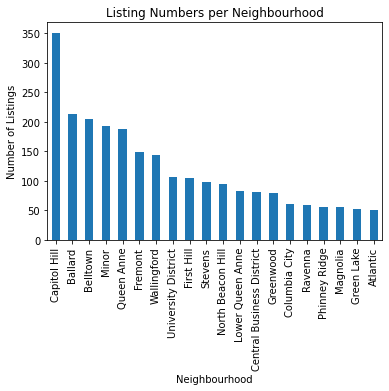

In [26]:
freq_n_hoods.plot(kind="bar");
plt.title("Listing Numbers per Neighbourhood")
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Listings');

### Results Evaluation

From the above bar chart, we notice that some neighbourhoods are superior among others in the number of listings especially Capitol Hill, followed by Ballard, Beltown, Minor, and Quenn Anne neighbourhoods.

In [27]:
# Cleaning the amenities column in the useful data frame to make answering the second question easier
useful_df['amenities'] = useful_df.amenities.str.replace("[{}]", "").str.replace('"', "")
useful_df['amenities'].head()

C:\Users\Bara'a\AppData\Local\Temp/ipykernel_7552/2928164627.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  useful_df['amenities'] = useful_df.amenities.str.replace("[{}]", "").str.replace('"', "")


0    TV,Cable TV,Internet,Wireless Internet,Air Con...
1    TV,Internet,Wireless Internet,Kitchen,Free Par...
2    TV,Cable TV,Internet,Wireless Internet,Air Con...
3    Internet,Wireless Internet,Kitchen,Indoor Fire...
4    TV,Cable TV,Internet,Wireless Internet,Kitchen...
Name: amenities, dtype: object

## Question 2: What are the most common amenities in general, and what are they in the most frequent neighbourhoods?

> At first. I will take a look at the most common amenities in general in the useful dataframe, then I'll take a look at the most common amenities in the most frequent neighbourhoods in Seattle listings to see of there is any difference.

### Data Preparation and Modelling

<AxesSubplot:>

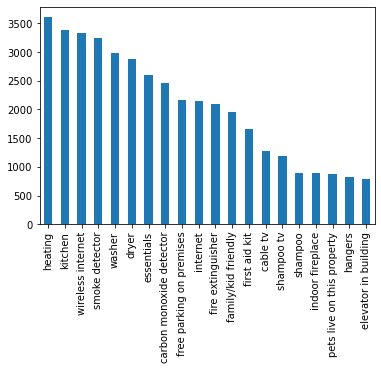

In [28]:
pd.Series(' '.join(useful_df['amenities']).lower().split(',')).value_counts()[:20].plot(kind='bar')

In [29]:
q2_df = useful_df[useful_df['neighbourhood'].isin(hoods_lst)]

In [30]:
(useful_df.shape, q2_df.shape)

((3818, 36), (2419, 36))

<AxesSubplot:>

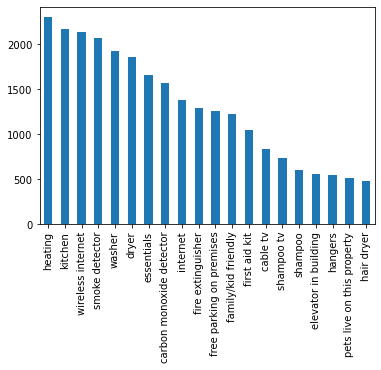

In [31]:
pd.Series(' '.join(q2_df['amenities']).lower().split(',')).value_counts()[:20].plot(kind='bar')

### Results Evaluation

From the two bar charts illustrated above, we notice that the most common amenities are almost similar between the general approach and in the top neighbourhoods, and that as I see is from two reasons, the first one is that the top 20 neighbourhoods listings numbers represent the vast majority of the total listings, and the second is that the most common amenities are so crusial amd almost no one can live without, such as kitchen, heating and wireless internet, however we notice some change in positions when the amenities become less common.

## Question 3: What are the properties that affects listing prices the most? In addition prices predictions of new listings.

### Data Modelling

<AxesSubplot:>

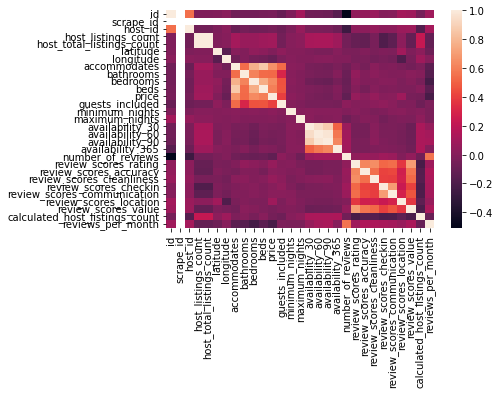

In [32]:
import seaborn as sns
# calculate the correlation matrix
corr = useful_df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

### Results Evaluation

From the above heat map and the below dictionary, we figure out that few numerical variables have reasonable correlation with the prices, and as we represent this in the following pair plot, we notice the positive correlation between price and the other numerical features, except for the reviews per month variable, I think the negative correlation is due to booking less expensive listings by people and as a result cheape listings gain more number of reviews.

In [33]:
# here I will represent the numerical variables which affect the listing prices reasonably.
high_corr = {}
for col in num_df.columns:
    correlation = (num_df['price'].corr(num_df[col]))
    if correlation > 0.2 or correlation < -0.2:
        high_corr[col] = correlation
        
high_corr

{'accommodates': 0.6592053369248411,
 'bathrooms': 0.5240241878085166,
 'bedrooms': 0.6330741805887617,
 'beds': 0.5960380691343182,
 'price': 1.0,
 'guests_included': 0.39917171332436574,
 'reviews_per_month': -0.21793776572734666}

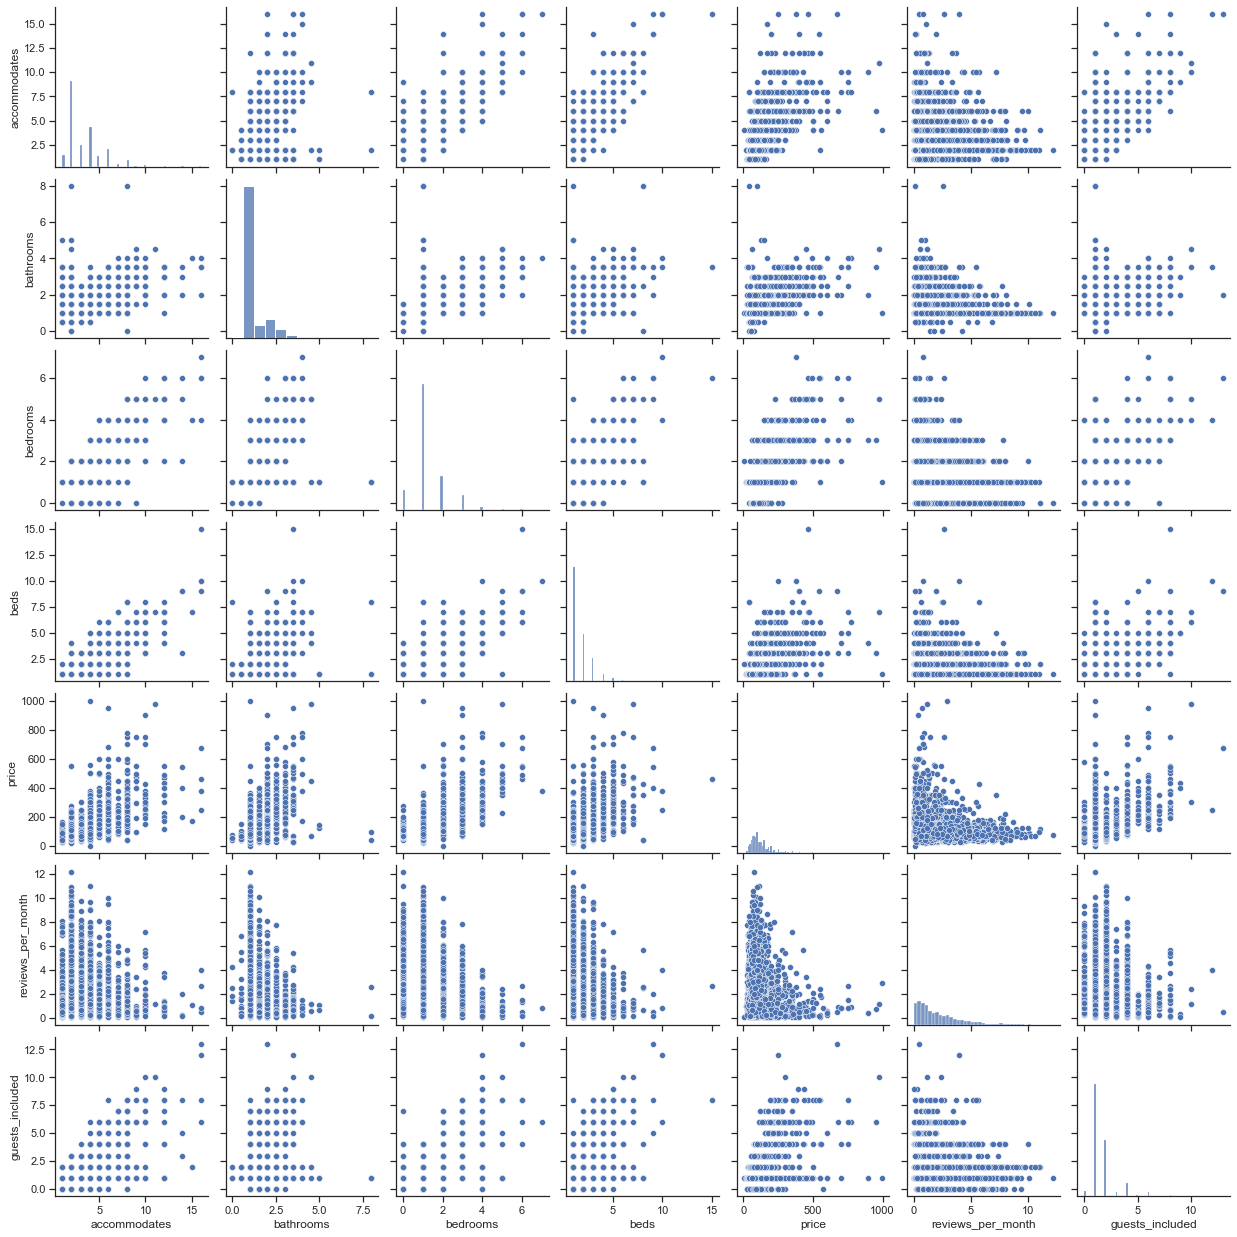

In [34]:
col = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'reviews_per_month', 'guests_included']
sns.set(style="ticks", color_codes=True)
sns.pairplot(useful_df[col].dropna())
plt.show();

In [35]:
useful_df.columns

Index(['id', 'scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'guests_included',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'calculated_host_listings_count',
       'reviews_per_month', 'host_identity_verified', 'room_type', 'bed_type',
       'cancellation_policy', 'property_type', 'neighbourhood', 'amenities'],
      dtype='object')

### Data Preparation

Below, I will start preparing the amenities column in dummy variable form as each amenity will represnt a separate column and generate dummy variable for other categorical columns to fit our prediction model to data frame called useful_new

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer =  CountVectorizer(tokenizer=lambda x: x.split(','))
amenities = count_vectorizer.fit_transform(useful_df['amenities'])
df_amenities = pd.DataFrame(amenities.toarray(), columns=count_vectorizer.get_feature_names())
df_amenities = df_amenities.drop('',1)

C:\Users\Bara'a\AppData\Local\Temp/ipykernel_7552/3472355991.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_amenities = df_amenities.drop('',1)


In [37]:
df_amenities.head()

,24-hour check-in,air conditioning,breakfast,buzzer/wireless intercom,cable tv,carbon monoxide detector,cat(s),dog(s),doorman,dryer,...,safety card,shampoo,smoke detector,smoking allowed,suitable for events,tv,washer,washer / dryer,wheelchair accessible,wireless internet
0,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,1
1,0,0,0,1,0,1,0,0,0,1,...,1,0,1,0,0,1,1,0,0,1
2,0,1,0,0,1,1,1,1,0,1,...,0,1,1,0,0,1,1,0,0,1
3,0,0,0,0,0,1,0,0,0,1,...,1,1,1,0,0,0,1,0,0,1
4,0,0,0,0,1,1,0,0,0,0,...,0,1,1,0,0,1,0,0,0,1


In [38]:
useful_new = useful_df.drop('amenities', axis=1)

In [39]:
'amenities' in useful_df.columns

True

In [40]:
'amenities' in useful_new.columns

False

In [41]:
useful_new = pd.concat([useful_new, df_amenities], axis=1, join='inner')

In [42]:
useful_new.head()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,safety card,shampoo,smoke detector,smoking allowed,suitable for events,tv,washer,washer / dryer,wheelchair accessible,wireless internet
0,241032,20160104002432,956883,3.0,3.0,47.636289,-122.371025,4,1.0,1.0,...,0,0,0,0,0,1,1,0,0,1
1,953595,20160104002432,5177328,6.0,6.0,47.639123,-122.365666,4,1.0,1.0,...,1,0,1,0,0,1,1,0,0,1
2,3308979,20160104002432,16708587,2.0,2.0,47.629724,-122.369483,11,4.5,5.0,...,0,1,1,0,0,1,1,0,0,1
3,7421966,20160104002432,9851441,1.0,1.0,47.638473,-122.369279,3,1.0,0.0,...,1,1,1,0,0,0,1,0,0,1
4,278830,20160104002432,1452570,2.0,2.0,47.632918,-122.372471,6,2.0,3.0,...,0,1,1,0,0,1,0,0,0,1


In [43]:
useful_new.columns

Index(['id', 'scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'guests_included',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'calculated_host_listings_count',
       'reviews_per_month', 'host_identity_verified', 'room_type', 'bed_type',
       'cancellation_policy', 'property_type', 'neighbourhood',
       '24-hour check-in', 'air conditioning', 'breakfast',
       'buzzer/wireless intercom', 'cable tv', 'carbon monoxide detector',
       'cat(s)', 'dog(s)', 'doorman', 'dryer', 'elevator in building',
       'essentials', 'family/kid friendly', 'fire ex

In [44]:
useful_new['host_identity_verified'] = useful_new['host_identity_verified'].replace('f',0,regex=True)
useful_new['host_identity_verified'] = useful_new['host_identity_verified'].replace('t',1,regex=True)

In [45]:
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    '''
    df = df.dropna(subset=['price'], axis=0)
    y = df['price']
    
    #Drop price column
    df = df.drop('price', axis=1)
    
     # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)
        
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    X = df
    return X, y
    
#Use the function to create X and y
X, y = clean_data(useful_new)    

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Splitting X,y to train and test data with 0.25 test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)

### Data Modelling

In [47]:
rfr = RandomForestRegressor(n_estimators=500, 
                               criterion='mse', 
                               random_state=3, 
                               n_jobs=-1)
# Fitting and training the model to our data
rfr.fit(X_train, y_train)
y_test_pred = rfr.predict(X_test)
rmse_rfr= (mean_squared_error(y_test,y_test_pred))**(1/2)

print('RMSE test: %.3f' % rmse_rfr)
print('R^2 test: %.3f' % (r2_score(y_test, y_test_pred)))

RMSE test: 47.620
R^2 test: 0.671


In [48]:
# Generating model coefficiants data frame
coefs_df = pd.DataFrame()
coefs_df['feature'] = X_train.columns
coefs_df['coefs'] = rfr.feature_importances_
coefs_df.sort_values('coefs', ascending=False).head(20)

,feature,coefs
9,bedrooms,0.367513
7,accommodates,0.091394
8,bathrooms,0.066860
5,latitude,0.034647
70,room_type_Private room,0.030308
6,longitude,0.025084
27,reviews_per_month,0.024793
18,number_of_reviews,0.023156
2,host_id,0.020344
17,availability_365,0.019880


### Results Evaluation

So, the best results we achieved is less than 48 dollars test RMSE error on average, and the model explains 67% of the variability in listing price, by RandomForestRegressor. The results are not the greatist bu  believe more features are needed and those features should be sharp and direct.

And from the coefficiants data frame, we notice that the physical features of the rooms themselves are affecting the pricing more than other features such as the neighbourhood or low priority amenities.